In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
def gradfun(x, t, params):
    """
    toy symmetric model
    """
    a, b  = params
    M, N = x
    return(np.array([a*M*(1-M)*(N-0.5),
                     b*N*(1-N)*(M-0.5)]))

Define some parameters and a range of $N$ values (not $t$ values!) to plot the gradient function: because we are using numpy arrays, the computation is automatically done for all values of $N$.

Now use the `scipy.integrate.odeint` function to integrate the differential equation numerically ...

In [2]:
tvec = np.arange(0,50,0.1)
params = (-1,1)  ## opposite signs, so pure-imaginary eigenvalues
s_low = scipy.integrate.odeint(
    gradfun,
    y0 = (0.7,0.7),
    t = tvec,
    args = (params,))

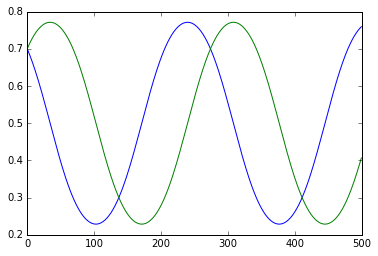

In [3]:
%matplotlib inline
plt.plot(s_low);


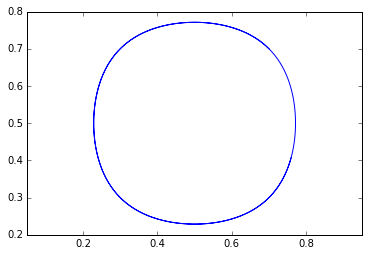

In [4]:
%matplotlib inline
## set equal 'aspect ratio': *physical* units of x and y are the same
## https://matplotlib.org/examples/pylab_examples/equal_aspect_ratio.html
plt.axes().set_aspect('equal', 'datalim')
plt.plot(s_low[:,0],s_low[:,1]);

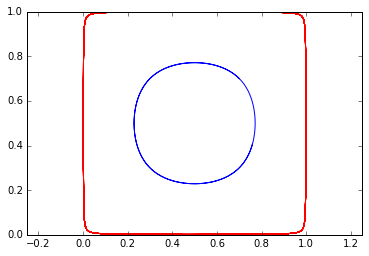

In [5]:
tvec2 = np.arange(0,1000,1)
s_hi = scipy.integrate.odeint(
    gradfun,
    y0 = (0.98,0.98),
    t = tvec2,
    args = (params,))
%matplotlib inline
## https://matplotlib.org/examples/pylab_examples/equal_aspect_ratio.html
plt.axes().set_aspect('equal', 'datalim')
plt.plot(s_low[:,0],s_low[:,1]);
plt.plot(s_hi[:,0],s_hi[:,1],c="red");

## phase plane

In [13]:
xvec = np.arange(-0.1,1.1,0.025)
yvec = np.arange(-0.1,1.1,0.025)
nx = len(xvec)
ny = len(yvec)
ns = 2 ## number of state variables
pp = np.zeros((nx,ny,ns))
for i in range(nx):
    for j in range(ny):
        pp[i,j,:] = gradfun((xvec[i],yvec[j]),0,params)

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d as mp3d

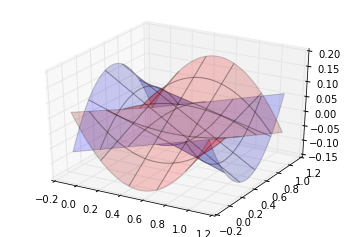

In [28]:
%matplotlib inline
X, Y = np.meshgrid(xvec,yvec)
## plt.plot_surface(X,Y,pp)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,pp[:,:,0],alpha=0.2)
ax.plot_surface(X,Y,pp[:,:,1],alpha=0.2,color="red");

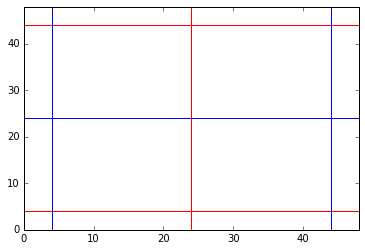

In [20]:
%matplotlib inline
plt.contour(pp[:,:,0],levels=[0],colors=["red"])
plt.contour(pp[:,:,1],levels=[0],colors=["blue"])

In [3]:
import sympy
a,b,M,N = sympy.symbols("a,b,M,N")

In [11]:
M_grad = a*M*(1-M)*(N-0.5)
print(sympy.solveset(sympy.Eq(M_grad, 0), M))
print(sympy.solveset(sympy.Eq(M_grad, 0), N))

{0, 1}
{0.5}
